Marc Kaylor Lab 2

Calls in a csv file from a google spreadsheet that contains peak discharge values from 1953-2015 for
the Colorado River below Bakers Gulch and the East River at Almont. the data contains the peak amount
of discharge for each location at each given year in cubic feet per second(cfs).
The data once called into the notebook was cleaned up to only have the lovation, Year, and Peak Q. To 
do this i used the drop functionality within pandas to delete Gauge and Date from the data. 

In [12]:
#setting up needed modules
from IPython.display import IFrame, Image, display, Latex, Math
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns  # Makes for nicer plots
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 5, 4
import pysal as ps
import numpy as np

In [3]:
#calling in datatset from google spreadsheet
url = "https://docs.google.com/spreadsheets/d/1GZsLJuO1bwmY6OGxdejlNIJt7JazG7QqLITYjqnCRn0/pub?output=csv"
Qgauge = pd.read_csv(url)
Qgauge.head()
#Qgauge

,Location,Gauge,Date,Year,Peak Q(cfs)
0,CO river below Baker Gulch,9010500,6/13/1953,1953,630
1,CO river below Baker Gulch,9010500,5/19/1954,1954,165
2,CO river below Baker Gulch,9010500,6/15/1955,1955,255
3,CO river below Baker Gulch,9010500,5/22/1956,1956,527
4,CO river below Baker Gulch,9010500,6/30/1957,1957,976


In [5]:
#delete columns that are not needed
QDrop = Qgauge.drop(['Gauge','Date'], axis=1)
QDrop.head()
#QDrop

,Location,Year,Peak Q(cfs)
0,CO river below Baker Gulch,1953,630
1,CO river below Baker Gulch,1954,165
2,CO river below Baker Gulch,1955,255
3,CO river below Baker Gulch,1956,527
4,CO river below Baker Gulch,1957,976


In [6]:
#tidy up the data set combining Year and Peak Q(cfs) to the same collumn with their corresponding values
#in the value column. 
tidy_Qgauge = pd.melt(QDrop, id_vars=["Location"],
                      var_name="Year,Peak Q(cfs),", value_name="value")
tidy_Qgauge.head()
#tidy_Qgauge

,Location,"Year,Peak Q(cfs),",value
0,CO river below Baker Gulch,Year,1953
1,CO river below Baker Gulch,Year,1954
2,CO river below Baker Gulch,Year,1955
3,CO river below Baker Gulch,Year,1956
4,CO river below Baker Gulch,Year,1957


In [7]:
pci = QDrop.ix[:, "Peak Q(cfs)":].T  # The 'T' means transpose...
pci.shape

(1, 126)

In [9]:
pci.ix[0, :].values  # 'Values' means just get the raw array

array([ 630,  165,  255,  527,  976,  820,  377,  386,  578,  582,  307,
        518,  880,  234,  721,  677,  685,  839,  840,  699,  688,  595,
        470,  347,  314,  792,  687,  699,  358,  422,  857,  780,  703,
        656,  364,  648,  298,  575,  437,  318,  578,  434,  819,  668,
        748,  428,  489,  690,  386,  233,  800,  180,  521,  494,  301,
        536,  494,  975, 1870,  186,  684, 1000,  928, 2900, 1170, 1540,
       2320, 4260, 2720, 1610, 1640, 1650, 2590, 1460, 2060, 2910, 1430,
       2200, 2650, 1990, 2500, 2030, 1790, 2410, 1750, 2290, 1400,  635,
       3130, 3300, 3130, 1300, 1860, 2650, 4030, 3200, 3060, 1820, 1430,
       1370, 1730, 1940, 1210, 2880, 2050, 4430, 3040, 3190, 1620, 1730,
       1800, 1430,  769, 2560, 1260, 2250, 2070, 1290, 3060, 2400, 2570,
       2770,  639, 1400, 2830, 2790], dtype=int64)

In [13]:
#defined classes into different quantile classes for each annual discharge value
q5 = np.array([ps.Quantiles(y).yb for y in pci.values]).T
q5.shape
q5[:, 0]

array([1, 0, 0, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0,
       0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0,
       0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 3, 0, 1, 2, 2, 4, 2, 3, 3, 4, 4,
       3, 3, 3, 4, 3, 3, 4, 2, 3, 4, 3, 4, 3, 3, 4, 3, 3, 2, 1, 4, 4, 4, 2,
       3, 4, 4, 4, 4, 3, 2, 2, 3, 3, 2, 4, 3, 4, 4, 4, 3, 3, 3, 2, 2, 4, 2,
       3, 3, 2, 4, 3, 4, 4, 1, 2, 4, 4])

In [14]:
# Add 1 because its easy to talk about it that way
QDrop["Group"] = q5.T.flatten() + 1
QDrop.head()

,Location,Year,Peak Q(cfs),Group
0,CO river below Baker Gulch,1953,630,2
1,CO river below Baker Gulch,1954,165,1
2,CO river below Baker Gulch,1955,255,1
3,CO river below Baker Gulch,1956,527,2
4,CO river below Baker Gulch,1957,976,3


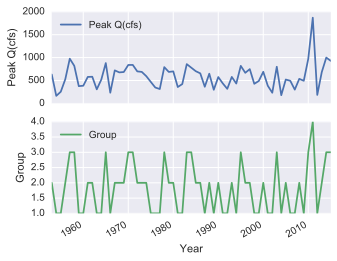

In [15]:
#seperate and only look at an inidividual site over time; colorado river below bakers gulch
CBG = QDrop[QDrop.Location == "CO river below Baker Gulch"].set_index("Year")
ax1, ax2 = CBG[["Peak Q(cfs)", "Group"]].plot(subplots=True)
ax1.set_ylabel("Peak Q(cfs)")
ax2.set_ylabel("Group")
plt.show()

In [16]:
#convert to marcov objects to summarize the transition dynamics for all units
m5 = ps.Markov(q5)
m5.transitions


array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [17]:
m5.p

matrix([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]])

In [18]:
m5.steady_state

matrix([[ 1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]])

In [19]:
ps.ergodic.fmpt(m5.p).round(4)  # Round for nicer formatting

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

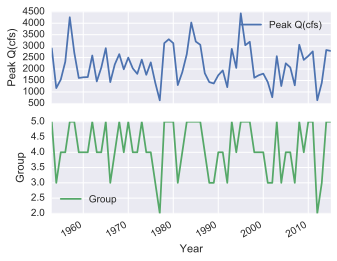

In [20]:
#looking at the East River at Almont
ERA = QDrop[QDrop.Location == "East River at Almont"].set_index("Year")
ax1, ax2 = ERA[["Peak Q(cfs)", "Group"]].plot(subplots=True)
ax1.set_ylabel("Peak Q(cfs)")
ax2.set_ylabel("Group")
plt.show()

In [21]:
#convert to marcov objects to summarize the transition dynamics for all units
m5 = ps.Markov(q5)
m5.transitions

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [22]:
m5.steady_state

matrix([[ 1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]])

In [23]:
ps.ergodic.fmpt(m5.p).round(4)  # Round for nicer formatting

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [25]:
subset = QDrop.ix[:, "Peak Q(cfs)":]  # Grab all the 'year' columns
rpci = subset / subset.mean(axis=0)
rpci.head()  # Is this tidy data?
#rpci

,Peak Q(cfs),Group
0,0.453499,0.670213
1,0.118774,0.335106
2,0.183559,0.335106
3,0.379355,0.670213
4,0.702563,1.005319


In [31]:
CBG.set_index("Peak Q(cfs)", inplace=True)
for key, grp in CBG.groupby("Year"):
    plt.plot(grp.time, label=key)
plt.legend(loc='best')    
plt.show()

KeyError: 'Year'